In [1]:
# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [2]:
# constants

G = 6.67408E-11     #m3 kg-1 s-2
c = 2.99792458E8    #m/s
pc = 3.086e+16      #m
arcsec_per_radian = 206264.94196924 
Msun = 1.989E30     #kg

theta1, theta2, check beta 30.26909170087124 -0.26909170087124573 29.999999999999993 30.0
r1, r2 73374.30110316175 -652.2962610668168
phi (rad, degrees) 2.6091850255360615e-06 0.00014949528993195025
source offset distance 145444.0096563451
0.0002921926035193612 0.0167414029865988
original ray offset 1304.5925307536963 -146748.589705285


<Figure size 432x288 with 0 Axes>

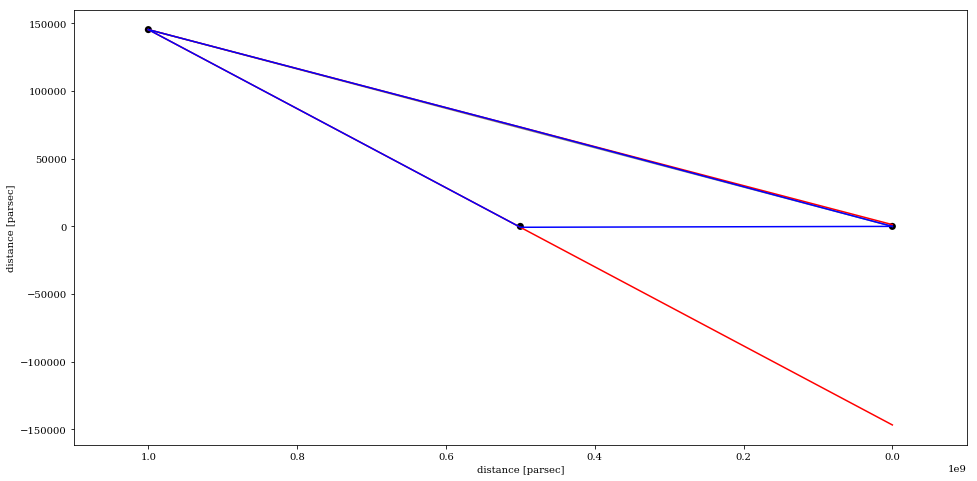

In [10]:
# EXAMPLE 1

# model parameters
# source is far to one side of the source

M = 1E12     # mass of lens, solar units
dL = 5E8     # distance to lens, parsecs
dS = 1E9     # distance to source, parsecs
beta = 30.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source




# calculations
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * pc))**(0.5)
#print(rad_term)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)

r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

phi = ((4 * G * M * Msun) / (r1 * pc * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

X1 = dS * np.tan(beta/arcsec_per_radian)
print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.xlabel('distance [parsec]')
plt.ylabel('distance [parsec]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')

<Figure size 432x288 with 0 Axes>

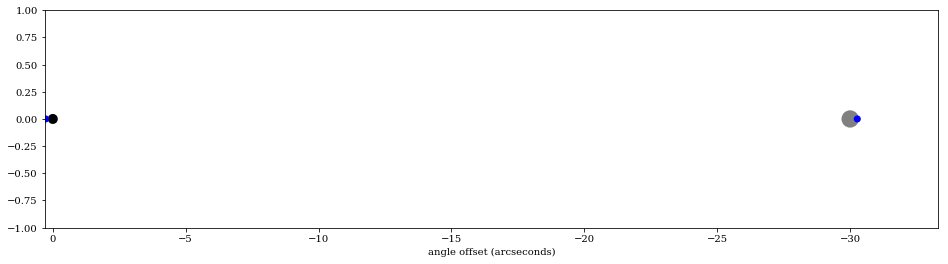

In [11]:

# our view of the sky

plt.clf()
plt.figure(figsize=(16,4))
plt.xlim(-1.1 * theta2 * arcsec_per_radian, -1.1 * theta1 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([-1*beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([-1*theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([-1*theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')


theta1, theta2, check beta 6.294095593104524 -1.2940955931045242 5.000000000000001 5.0
r1, r2 15257.308234175634 -3136.974176916818
phi (rad, degrees) 1.2547896703608007e-05 0.0007189415228828569
source offset distance 24240.668109876824
5.4755284518865926e-05 0.003137246708969032
original ray offset 6273.948352671465 -30514.616381628417


<Figure size 432x288 with 0 Axes>

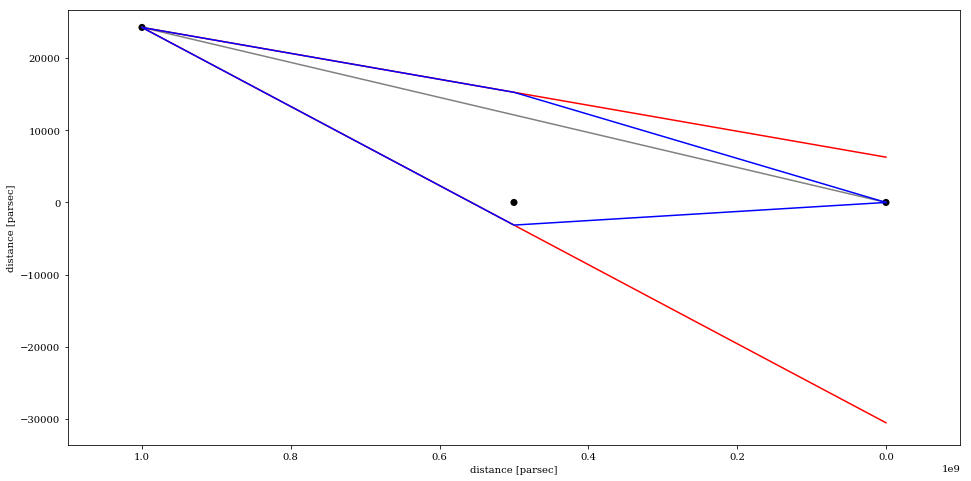

In [14]:
#EXAMPLE 2

# model parameters
# source is barely off to one side of the source, everything else is the same

M = 1E12     # mass of lens, solar units
dL = 5E8     # distance to lens, parsecs
dS = 1E9     # distance to source, parsecs
beta = 5.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source




# calculations
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * pc))**(0.5)
#print(rad_term)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)

r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

phi = ((4 * G * M * Msun) / (r1 * pc * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

X1 = dS * np.tan(beta/arcsec_per_radian)
print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.xlabel('distance [parsec]')
plt.ylabel('distance [parsec]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')

<Figure size 432x288 with 0 Axes>

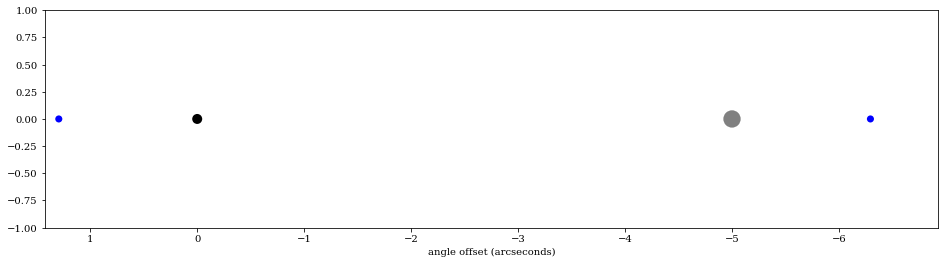

In [15]:

# our view of the sky

plt.clf()
plt.figure(figsize=(16,4))
plt.xlim(-1.1 * theta2 * arcsec_per_radian, -1.1 * theta1 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([-1*beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([-1*theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([-1*theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')


theta1, theta2, check beta 11.419442377555704 -6.419442377555703 5.000000000000001 5.0
r1, r2 5536.298258055778 -3112.231442891369
phi (rad, degrees) 3.4580349318964546e-05 0.0019813080700647593
source offset distance 24240.668109876824
3.0392110604829352e-05 0.0017413396681515137
original ray offset 3458.0349018550805 -6151.442490273763


<Figure size 432x288 with 0 Axes>

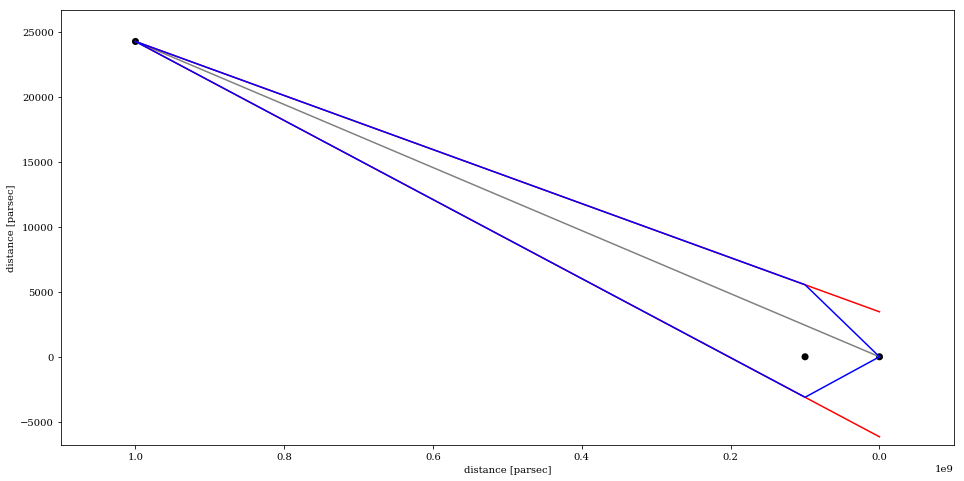

In [16]:
#EXAMPLE 3, lens is close to us

# model parameters
# source is barely off to one side of the source, everything else is the same

M = 1E12     # mass of lens, solar units
dL = 1E8     # distance to lens, parsecs
dS = 1E9     # distance to source, parsecs
beta = 5.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source




# calculations
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * pc))**(0.5)
#print(rad_term)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)

r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

phi = ((4 * G * M * Msun) / (r1 * pc * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

X1 = dS * np.tan(beta/arcsec_per_radian)
print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.xlabel('distance [parsec]')
plt.ylabel('distance [parsec]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')

<Figure size 432x288 with 0 Axes>

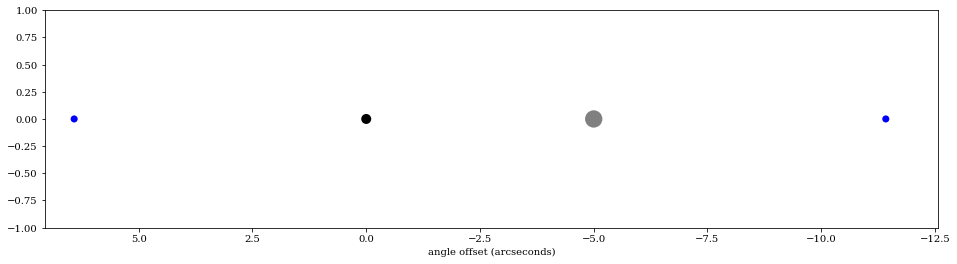

In [17]:

# our view of the sky

plt.clf()
plt.figure(figsize=(16,4))
plt.xlim(-1.1 * theta2 * arcsec_per_radian, -1.1 * theta1 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([-1*beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([-1*theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([-1*theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')


In [8]:
#remainder are diagnostic plots.  Maybe we'll come back to adding these in, but not MVP

<Figure size 432x288 with 0 Axes>

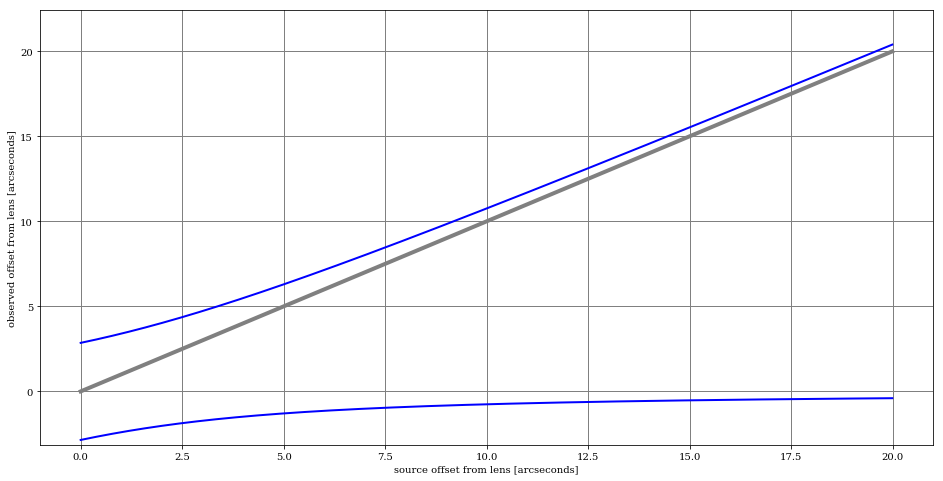

In [6]:
# model parameters

M = 1E12     # mass of lens, solar units
dL = 5E8     # distance to lens, parsecs
dS = 1E9     # distance to source, parsecs
beta = 20.0  # angle between lens and source, parsecs
betas = np.arange(0,20,0.01)
theta1s = np.zeros(len(betas))
theta2s = np.zeros(len(betas))
j=0

for beta in betas:
    # calculations
    radical_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * pc))**(0.5)
    #print(rad_term)
    theta1 = ((beta / arcsec_per_radian) + radical_term)/2
    theta2 = ((beta / arcsec_per_radian) - radical_term)/2
    #print('theta1, theta2, check beta', theta1 * arcsec_per_rad, theta2 * arcsec_per_rad, (theta1+theta2)*arcsec_per_rad, beta)
    theta1s[j] = theta1 * arcsec_per_radian
    theta2s[j] = theta2 * arcsec_per_radian
    j+= 1
    
    r1 = dL * np.tan(theta1)
    r2 = dL * np.tan(theta2)
    #print('r1, r2', r1, r2)

    phi = ((4 * G * M * Msun) / (r1 * pc * c**2))
    #print('phi (rad, degrees)', phi, phi * 180 / np.pi)

    X1 = dS * np.tan(beta/arcsec_per_radian)
    #print('source offset distance', X1)

    # calculate how far off to the side the observed light would have landed
    Y1 = X1 - dS*np.tan(theta1 - phi)
    #Y2 = X1 - (X1 - r2) * dL / (dS-dL)
    #print(X1, (X1 - r2), dL / (dS-dL))
    alpha = np.arctan2(X1-r2,dS-dL)
    #print(alpha,alpha*180/np.pi)
    Y2 = X1 - dS * np.sin(alpha)
    #print('original ray offset', Y1,Y2)


plt.clf()
plt.figure(figsize=(16,8))
plt.xlim(np.min(betas)-1, np.max(betas)+1)
plt.ylim(1.1 * np.min(theta2s), 1.1 * np.max(theta1s))
plt.xlabel('source offset from lens [arcseconds]')
plt.ylabel('observed offset from lens [arcseconds]')

#plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
plt.plot(betas,theta1s, c = 'blue', linewidth = 2)
plt.plot(betas,theta2s, c = 'blue', linewidth = 2)
plt.plot(betas,betas, c = 'gray', linewidth = 4)

#ax.grid(True)
plt.grid(linestyle='-', linewidth=1, color='gray')



<Figure size 432x288 with 0 Axes>

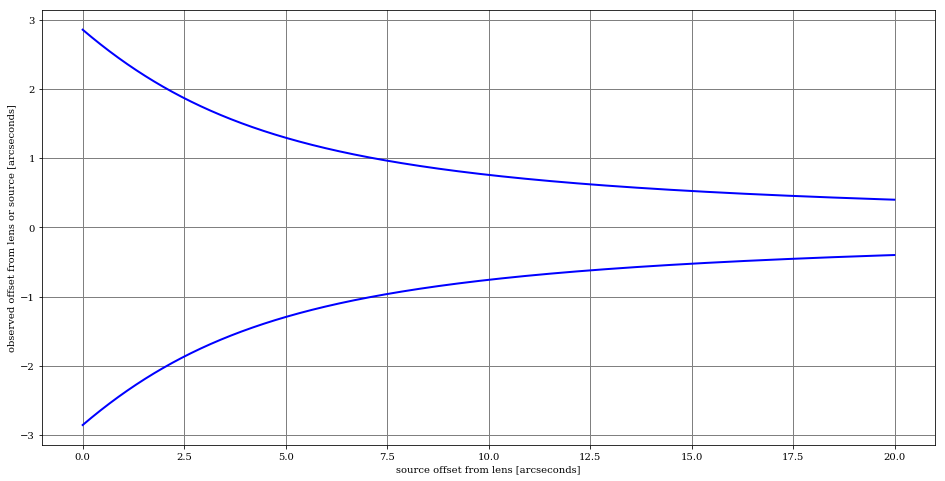

In [7]:
theta1_offset_source = theta1s - betas

plt.clf()
plt.figure(figsize=(16,8))
plt.xlim(np.min(betas)-1, np.max(betas)+1)
plt.ylim(1.1 * np.min(theta2s), 1.1 * np.max(theta1_offset_source))
plt.xlabel('source offset from lens [arcseconds]')
plt.ylabel('observed offset from lens or source [arcseconds]')

#plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
plt.plot(betas,theta1_offset_source, c = 'blue', linewidth = 2)
plt.plot(betas,theta2s, c = 'blue', linewidth = 2)
#plt.plot(betas,betas, c = 'gray', linewidth = 4)

#ax.grid(True)
plt.grid(linestyle='-', linewidth=1, color='gray')
